In [21]:
#4DLI is at index 5

import pickle
import matplotlib.pyplot as plt
import pandas as pd

infile = open('MAPK14_rmsds','rb')
rmsd_set = pickle.load(infile)
infile.close()

infile = open('MAPK14_ligand_names','rb')
ligands = pickle.load(infile)
infile.close()

infile = open('MAPK14_gscores','rb')
gscores = pickle.load(infile)
infile.close()

del ligands[5]
del gscores[5]

for ls in gscores:
    del ls[5]

In [22]:
#row is for structure
#column is for ligand
#each element is a list of all poses
inv_rmsd = []
counter = 0
for i in range(26):
    arr = []
    for j in range(26):
        arr.append(rmsd_set[counter][:])
        counter += 1
    inv_rmsd.append(arr)

In [155]:
import numpy as np
#row is for ligand
#column is for structure
#each element is a list of all poses
rmsd = []
for i in range(26):
    arr = []
    for j in range(26):
        arr.append(inv_rmsd[j][i][:])
    rmsd.append(arr)

del rmsd[5]
for ls in rmsd:
    del ls[5]
outfile = open('MAPK14_rmsds_2x2grid', 'wb')
pickle.dump(rmsd, outfile)
outfile.close()

In [24]:
print("With self docking:")
print()
self_gscore_pairs = []
self_rmsd_pairs = []
self_simm = 0
self_simm_gscore = 0
self_simm_rmsd = 0
self_gscore_rmsds = []

for i in range(len(ligands)):
    gscore_best = min(gscores[i])
    min_rmsds = []
    for j in range(len(ligands)):
        min_rmsds.append((min(rmsd[i][j][:]), rmsd[i][j].index(min(rmsd[i][j][:]))))
    rmsd_best = min(min_rmsds)
    if ligands[gscores[i].index(gscore_best)] == ligands[min_rmsds.index(rmsd_best)]:
        self_simm += 1
    if ligands[gscores[i].index(gscore_best)] == ligands[i]:
        self_simm_gscore += 1
    if ligands[min_rmsds.index(rmsd_best)] == ligands[i]:
        self_simm_rmsd += 1
    self_gscore_pairs.append(ligands[gscores[i].index(gscore_best)])
    self_rmsd_pairs.append(ligands[min_rmsds.index(rmsd_best)])
    print("For ligand ", ligands[i], " GSCORE best pose is with the protein corresponding to ligand ", ligands[gscores[i].index(gscore_best)])
    print("The corresponding gscore is ", gscore_best)
    print("The RMSD for this combination is ", rmsd[i][gscores[i].index(gscore_best)][0])
    self_gscore_rmsds.append(rmsd[i][gscores[i].index(gscore_best)][0])
    print("For ligand ", ligands[i], " RMSD best is pose ", rmsd_best[1], "is with the protein corresponding to ligand ", ligands[min_rmsds.index(rmsd_best)])
    print("The corresponding rmsd is ", rmsd_best[0])
    print()
    

With self docking:

For ligand  3HUB  GSCORE best pose is with the protein corresponding to ligand  3HUB
The corresponding gscore is  -10.58
The RMSD for this combination is  0.463086673498
For ligand  3HUB  RMSD best is pose  0 is with the protein corresponding to ligand  3HUB
The corresponding rmsd is  0.463086673498

For ligand  2YIX  GSCORE best pose is with the protein corresponding to ligand  2YIX
The corresponding gscore is  -11.11
The RMSD for this combination is  0.720546960368
For ligand  2YIX  RMSD best is pose  0 is with the protein corresponding to ligand  1KV1
The corresponding rmsd is  0.524619282515

For ligand  3HUC  GSCORE best pose is with the protein corresponding to ligand  3E93
The corresponding gscore is  -8.21
The RMSD for this combination is  3.80376528306
For ligand  3HUC  RMSD best is pose  35 is with the protein corresponding to ligand  3HUC
The corresponding rmsd is  0.451410204037

For ligand  3D83  GSCORE best pose is with the protein corresponding to lig

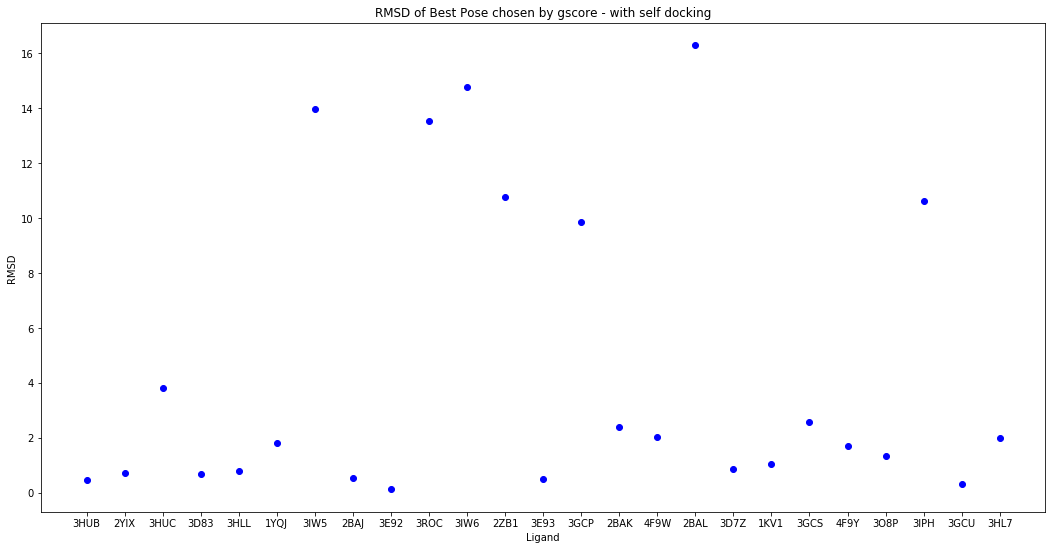

In [25]:
plt.scatter(ligands, self_gscore_rmsds, color = "b")
plt.title('RMSD of Best Pose chosen by gscore - with self docking')
plt.xlabel('Ligand')
plt.ylabel('RMSD')

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

plt.show()

In [26]:
print("Average RMSD over all: ", sum(self_gscore_rmsds) / 26)

Average RMSD over all:  4.366647567413885


In [27]:
cross_gscores = gscores
cross_rmsd = rmsd
for i in range(len(ligands)):
    for j in range(len(ligands)):
        if i == j:
            cross_gscores[i][j] = 100
            cross_rmsd[i][j] = [100]

In [28]:
print("Without self docking:")
print()
cross_gscore_pairs = []
cross_rmsd_pairs = []
simm = 0
simm_gscore = 0
simm_rmsd = 0
cross_gscore_rmsds = []

for i in range(len(ligands)):
    gscore_best = min(cross_gscores[i])
    min_rmsds = []
    for j in range(len(ligands)):
        min_rmsds.append((min(cross_rmsd[i][j][:]), cross_rmsd[i][j].index(min(cross_rmsd[i][j][:]))))
    rmsd_best = min(min_rmsds)
    if ligands[cross_gscores[i].index(gscore_best)] == ligands[min_rmsds.index(rmsd_best)]:
        simm += 1
    if ligands[cross_gscores[i].index(gscore_best)] == ligands[i]:
        simm_gscore += 1
    if ligands[min_rmsds.index(rmsd_best)] == ligands[i]:
        simm_rmsd += 1
    cross_gscore_pairs.append(ligands[gscores[i].index(gscore_best)])
    cross_rmsd_pairs.append(ligands[min_rmsds.index(rmsd_best)])
    print("For ligand ", ligands[i], " GSCORE best pose is with the protein corresponding to ligand ", ligands[cross_gscores[i].index(gscore_best)])
    print("The corresponding gscore is ", gscore_best)
    print("The RMSD for this combination is ", cross_rmsd[i][cross_gscores[i].index(gscore_best)][0])
    cross_gscore_rmsds.append(cross_rmsd[i][cross_gscores[i].index(gscore_best)][0])
    print("For ligand ", ligands[i], " RMSD best is pose ", rmsd_best[1], "is with the protein corresponding to ligand ", ligands[min_rmsds.index(rmsd_best)])
    print("The corresponding rmsd is ", rmsd_best[0])
    print()

Without self docking:

For ligand  3HUB  GSCORE best pose is with the protein corresponding to ligand  2YIX
The corresponding gscore is  -10.17
The RMSD for this combination is  1.86369122792
For ligand  3HUB  RMSD best is pose  2 is with the protein corresponding to ligand  3ROC
The corresponding rmsd is  0.641651235695

For ligand  2YIX  GSCORE best pose is with the protein corresponding to ligand  3D7Z
The corresponding gscore is  -10.91
The RMSD for this combination is  1.39786397824
For ligand  2YIX  RMSD best is pose  0 is with the protein corresponding to ligand  1KV1
The corresponding rmsd is  0.524619282515

For ligand  3HUC  GSCORE best pose is with the protein corresponding to ligand  3E93
The corresponding gscore is  -8.21
The RMSD for this combination is  3.80376528306
For ligand  3HUC  RMSD best is pose  70 is with the protein corresponding to ligand  3GCP
The corresponding rmsd is  1.06027883935

For ligand  3D83  GSCORE best pose is with the protein corresponding to lig

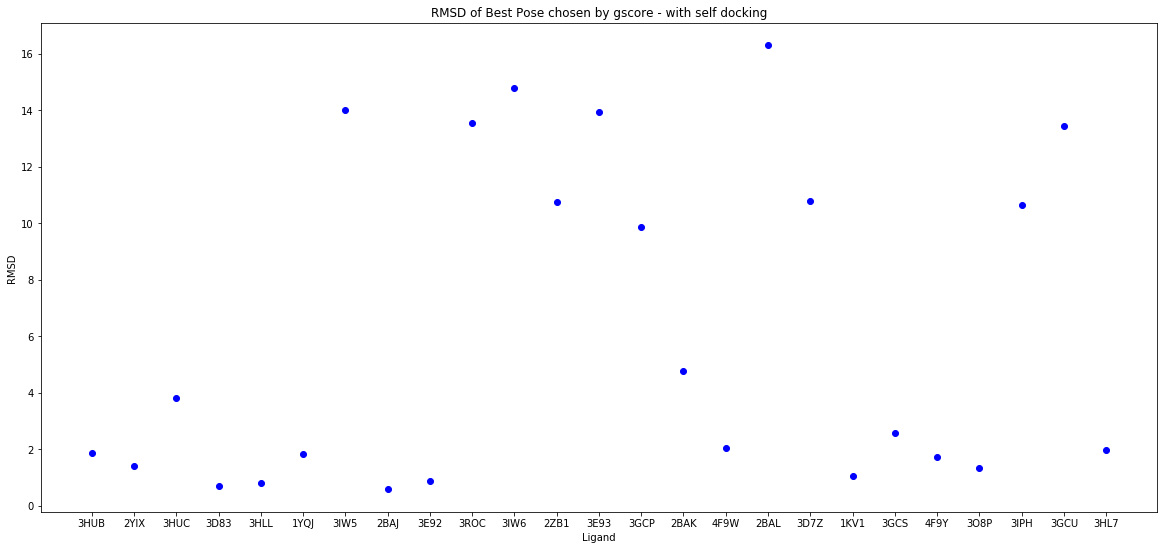

In [29]:
plt.scatter(ligands, cross_gscore_rmsds, color = "b")
plt.title('RMSD of Best Pose chosen by gscore - with self docking')
plt.xlabel('Ligand')
plt.ylabel('RMSD')
plt.show()

In [30]:
print("Average RMSD over cross docking: ", sum(cross_gscore_rmsds) / 26)

Average RMSD over cross docking:  5.969810375560306


In [149]:
import numpy as np
#row is for ligand
#column is for structure
#each element is a list of all poses

rmsd = []
for i in range(26):
    arr = []
    for j in range(26):
        arr.append(inv_rmsd[j][i][0])
    rmsd.append(arr)

del rmsd[5]
for ls in rmsd:
    del ls[5]

    
np_rmsd = np.array(rmsd)

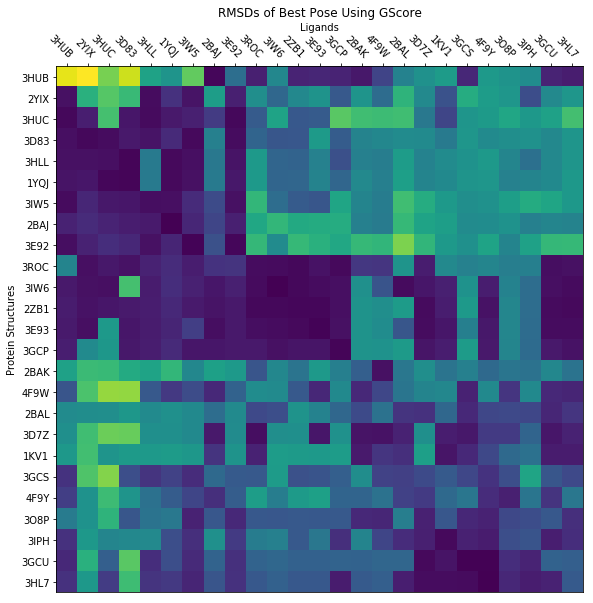

In [153]:
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

fig, ax = plt.subplots()
im = ax.imshow(D)

# We want to show all ticks...
ax.set_xticks(np.arange(len(ligands)))
ax.set_yticks(np.arange(len(ligands)))
# ... and label them with the respective list entries
ax.set_xticklabels(ligands)
ax.set_yticklabels(ligands)
ax.xaxis.tick_top()

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=315, ha="right",
         rotation_mode="anchor")

ax.set_title("RMSDs of Best Pose Using GScore")
ax.set_xlabel('Ligands', labelpad = -570)
ax.set_ylabel('Protein Structures')
fig.tight_layout()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.show()

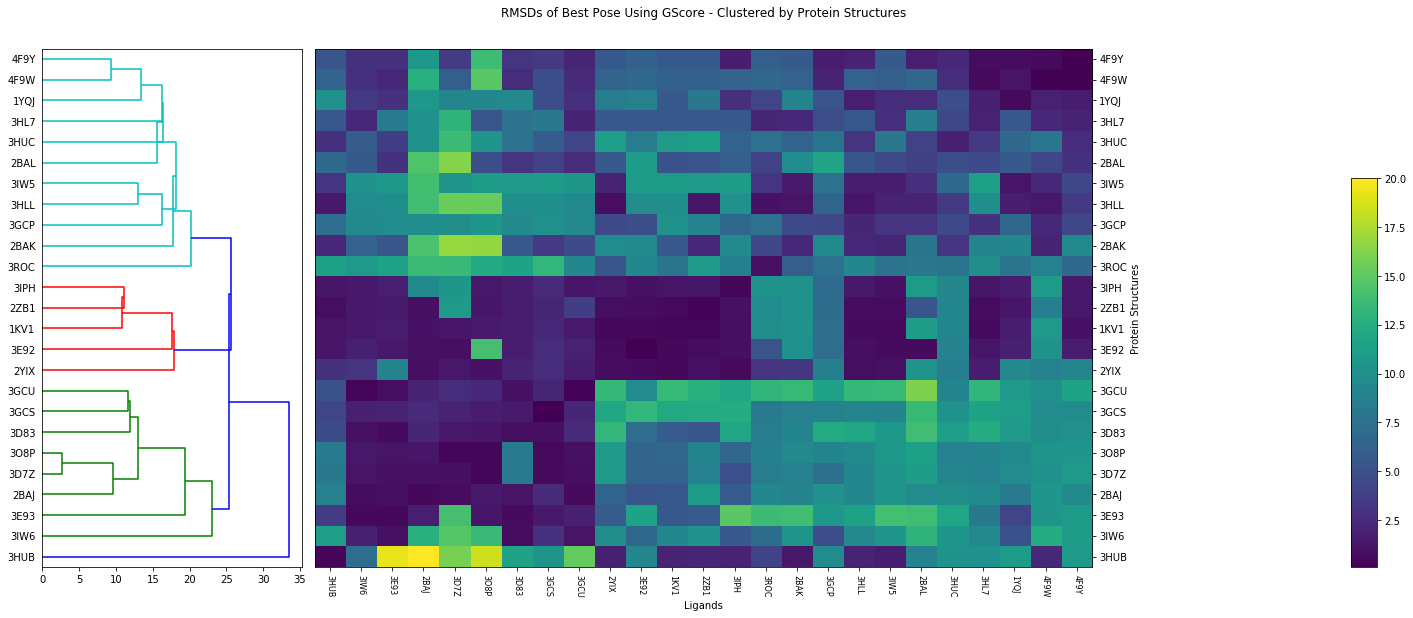

In [154]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generate features and distance matrix.
D = np_rmsd

# Compute and plot dendrogram.
fig = pylab.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
Y = sch.linkage(D, method='centroid')
labelList = ligands
Z = sch.dendrogram(Y, orientation='right', labels=labelList)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
index = Z['leaves']

x_ligands = []
for i in range(len(index)):
    x_ligands.append(ligands[index[i]])
y_ligands = x_ligands

D = D[index,:]
D = D[:,index]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("RMSDs of Best Pose Using GScore - Clustered by Protein Structures")
axmatrix.set_xlabel('Ligands')
axmatrix.set_ylabel('Protein Structures')

# Plot colorbar.
axcolor = fig.add_axes([1.1,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram_cluster_protein.png')

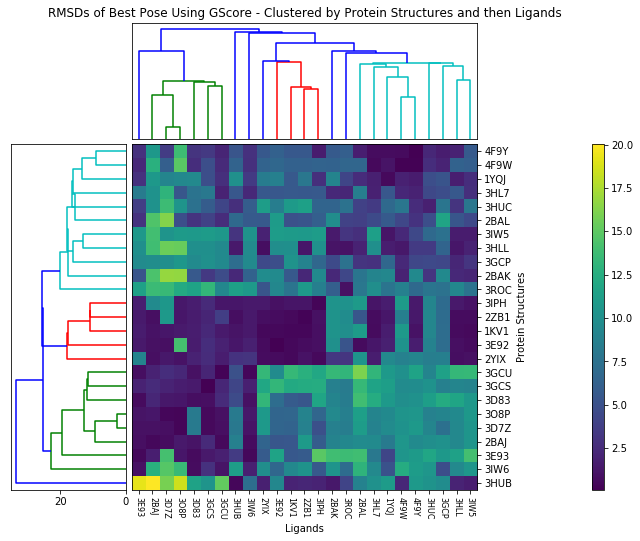

In [152]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
import pandas as pd

# Generate features and distance matrix.
D = np_rmsd
condensedD = D

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(condensedD, method='centroid')
labelList = ligands
Z1 = sch.dendrogram(Y, orientation='left', labels=labelList)
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(condensedD, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
y_ligands = []
for i in range(len(idx1)):
    y_ligands.append(ligands[idx1[i]])
x_ligands = []
for i in range(len(idx2)):
    x_ligands.append(ligands[idx2[i]])
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower')
axmatrix.set_xticks(range(25))
axmatrix.set_xticklabels(x_ligands, minor=False)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90, fontsize=8)

axmatrix.set_yticks(range(25))
axmatrix.set_yticklabels(y_ligands, minor=False)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

axmatrix.set_title("RMSDs of Best Pose Using GScore - Clustered by Protein Structures and then Ligands", pad = 110)
axmatrix.set_xlabel('Ligands')
axmatrix.set_ylabel('Protein Structures')

# Plot colorbar.
axcolor = fig.add_axes([1.1,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram_cluster_protein_and_ligand.png')